Nama : Mohamad Rasyid Ridho

NIM : 1197050073

Kelas : Praktikum Sismul A



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as img 
# from scipy.io import loadmat 
from scipy import misc 
import imageio
from keras.preprocessing.image import save_img

In [ ]:
def read_image(): 
	# loading the png image as a 3d matrix 
	img = imageio.imread('/content/forest.png')

	# uncomment the below code to view the loaded image 
	# plt.imshow(A) # plotting the image 
	# plt.show() 
	
	# scaling it so that the values are small 
	img = img / 255

	return img 

In [ ]:
def initialize_means(img, clusters): 
	
	# reshaping it or flattening it into a 2d matrix 
	points = np.reshape(img, (img.shape[0] * img.shape[1], 
											img.shape[2]))
	#print("points")
	#print(points)    
	m, n = points.shape 

	# clusters is the number of clusters 
	# or the number of colors that we choose. 
	
	# means is the array of assumed means or centroids. 
	means = np.zeros((clusters, n)) 

	# random initialization of means. 
	for i in range(clusters): 
		rand1 = int(np.random.random(1)*10) 
		rand2 = int(np.random.random(1)*8) 
		means[i, 0] = points[rand1, 0] 
		means[i, 1] = points[rand2, 1]
		means[i, 2] = points[rand2, 2]
	print(means)
	return points, means 

In [ ]:
# Function to measure the euclidean 
# distance (distance formula) 
def distance(x1, y1, x2, y2): 
	
	dist = np.square(x1 - x2) + np.square(y1 - y2) 
	dist = np.sqrt(dist) 

	return dist 

In [ ]:
def k_means(points, means, clusters): 

	iterations = 10 # the number of iterations 
	m, n = points.shape 
	
	# these are the index values that 
	# correspond to the cluster to 
	# which each pixel belongs to. 
	index = np.zeros(m) 

	# k-means algorithm. 
	while(iterations > 0): 

		for j in range(len(points)): 
			
			# initialize minimum value to a large value 
			minv = 1000
			temp = None
			
			for k in range(clusters): 
				
				x1 = points[j, 0] 
				y1 = points[j, 1] 
				x2 = means[k, 0] 
				y2 = means[k, 1] 
				
				if(distance(x1, y1, x2, y2) < minv):		 
					minv = distance(x1, y1, x2, y2) 
					temp = k 
					index[j] = k 
		
		for k in range(clusters): 
			
			sumx = 0
			sumy = 0
			count = 0
			
			for j in range(len(points)): 
				
				if(index[j] == k): 
					sumx += points[j, 0] 
					sumy += points[j, 1] 
					count += 1
			
			if(count == 0): 
				count = 1	
			
			means[k, 0] = float(sumx / count) 
			means[k, 1] = float(sumy / count)	 
			
		iterations -= 1

	return means, index 

In [ ]:
def compress_image(means, index, img): 

	# recovering the compressed image by 
	# assigning each pixel to its corresponding centroid. 
	centroid = np.array(means) 
	recovered = centroid[index.astype(int), :] 
	
	# getting back the 3d matrix (row, col, rgb(3)) 
	recovered = np.reshape(recovered, (img.shape[0], img.shape[1], 
													img.shape[2])) 

	# plotting the compressed image. 
	plt.imshow(recovered) 
	plt.show() 

	# saving the compressed image. 
	save_img('compressed_' + str(clusters) +
						'_colors.png', recovered)

Enter the number of colors in the compressed image. default = 16
16
[[0.09411765 0.09411765 0.0627451 ]
 [0.16078431 0.29019608 0.19215686]
 [0.25882353 0.12941176 0.09411765]
 [0.12941176 0.09411765 0.0627451 ]
 [0.09411765 0.16078431 0.16078431]
 [0.16078431 0.12941176 0.09411765]
 [0.12941176 0.16078431 0.12941176]
 [0.09411765 0.12941176 0.09411765]
 [0.12941176 0.16078431 0.12941176]
 [0.12941176 0.09411765 0.0627451 ]
 [0.25882353 0.29019608 0.19215686]
 [0.12941176 0.12941176 0.09411765]
 [0.16078431 0.29019608 0.19215686]
 [0.12941176 0.16078431 0.16078431]
 [0.09411765 0.16078431 0.12941176]
 [0.16078431 0.16078431 0.16078431]]


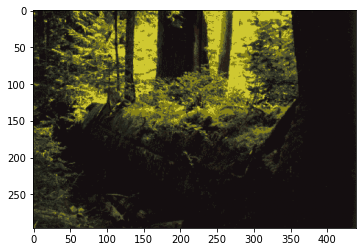

In [ ]:
# Driver Code 
if __name__ == '__main__': 

	img = read_image() 

	clusters = 16
	clusters = int(input('Enter the number of colors in the compressed image. default = 16\n')) 

	points, means = initialize_means(img, clusters) 
	means, index = k_means(points, means, clusters) 
	compress_image(means, index, img)